In [1]:
import numpy as np
import os
import time
from GoogLeNet import Xception
from keras.preprocessing import image
from keras.layers import GlobalAveragePooling2D, Dense, Dropout,Activation,Flatten

from imagenet_utils import preprocess_input
from keras.layers import Input
from keras.models import Model
from keras.utils import np_utils
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [2]:
# Loading the training data
PATH = os.getcwd()
# Define data path
data_path = PATH + '/newdata'
data_dir_list = os.listdir(data_path)

In [3]:
img_data_list=[]

for dataset in data_dir_list:
	img_list=os.listdir(data_path+'/'+ dataset)
	print ('Loaded the images of dataset-'+'{}\n'.format(dataset))
	for img in img_list:
		img_path = data_path + '/'+ dataset + '/'+ img 
		img = image.load_img(img_path, target_size=(224, 224))
		x = image.img_to_array(img)
		x = np.expand_dims(x, axis=0)
		x = preprocess_input(x)
		print('Input image shape:', x.shape)
		img_data_list.append(x)

Loaded the images of dataset-ripe

Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 2

Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 

In [4]:
img_data = np.array(img_data_list)
#img_data = img_data.astype('float32')
print (img_data.shape)
img_data=np.rollaxis(img_data,1,0)
print (img_data.shape)
img_data=img_data[0]
print (img_data.shape)

(400, 1, 224, 224, 3)
(1, 400, 224, 224, 3)
(400, 224, 224, 3)


In [5]:
num_classes = 2
num_of_samples = img_data.shape[0]
labels = np.ones((num_of_samples,),dtype='int64')

labels[0:199]=0
labels[200:]=1


names = ['ripe','unripe']

In [6]:
# convert class labels to on-hot encoding
Y = np_utils.to_categorical(labels, num_classes)

#Shuffle the dataset
x,y = shuffle(img_data,Y, random_state=2)
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [7]:
#Training the classifier alone
image_input = Input(shape=(224, 224, 3))

model = Xception(input_tensor=image_input, include_top=False,weights='imagenet')
model.summary()
last_layer = model.output
x= Flatten()(last_layer)
out = Dense(num_classes, activation='relu')(x)
x=Dropout(0.5)(x)
predictions=Dense(2, activation='softmax')(x)
custom_googlenet_model = Model(inputs=image_input,outputs= predictions)
custom_googlenet_model.summary()

for layer in custom_googlenet_model.layers[:-1]:
	layer.trainable = False

custom_googlenet_model.layers[-1].trainable

custom_googlenet_model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

t=time.time()
hist = custom_googlenet_model.fit(X_train, y_train, batch_size=32, epochs=100, verbose=1, validation_data=(X_test, y_test))
print('Training time: %s' % (t - time.time()))
(loss, accuracy) = custom_googlenet_model.evaluate(X_test, y_test, batch_size=10, verbose=1)

print("[INFO] loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 111, 111, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 111, 111, 32) 0           block1_conv1_bn[0][0]            
__________________________________________________________________________________________________
block1_con

Train on 320 samples, validate on 80 samples
Epoch 1/100
320/320 [==============================] - 209s 652ms/step - loss: 1.3029 - acc: 0.6250 - val_loss: 3.9576 - val_acc: 0.5000
Epoch 2/100
320/320 [==============================] - 209s 655ms/step - loss: 0.7415 - acc: 0.8250 - val_loss: 4.5616 - val_acc: 0.5000
Epoch 3/100
320/320 [==============================] - 213s 666ms/step - loss: 0.3144 - acc: 0.8969 - val_loss: 4.8732 - val_acc: 0.5000
Epoch 4/100
320/320 [==============================] - 215s 673ms/step - loss: 0.0507 - acc: 0.9812 - val_loss: 6.8525 - val_acc: 0.4500
Epoch 5/100
320/320 [==============================] - 212s 661ms/step - loss: 0.1463 - acc: 0.9594 - val_loss: 7.8532 - val_acc: 0.4750
Epoch 6/100
320/320 [==============================] - 207s 647ms/step - loss: 0.0702 - acc: 0.9812 - val_loss: 6.8068 - val_acc: 0.4375
Epoch 7/100
320/320 [==============================] - 210s 655ms/step - loss: 0.0336 - acc: 0.9875 - val_loss: 7.1110 - val_acc: 0.4

320/320 [==============================] - 213s 665ms/step - loss: 0.0023 - acc: 1.0000 - val_loss: 7.4975 - val_acc: 0.4625
Epoch 60/100
320/320 [==============================] - 212s 663ms/step - loss: 0.0044 - acc: 1.0000 - val_loss: 6.8591 - val_acc: 0.5125
Epoch 61/100
320/320 [==============================] - 212s 662ms/step - loss: 0.0067 - acc: 0.9969 - val_loss: 6.3700 - val_acc: 0.4875
Epoch 62/100
320/320 [==============================] - 214s 668ms/step - loss: 0.0113 - acc: 0.9938 - val_loss: 5.9649 - val_acc: 0.4375
Epoch 63/100
320/320 [==============================] - 216s 676ms/step - loss: 0.0098 - acc: 0.9969 - val_loss: 6.9407 - val_acc: 0.5000
Epoch 64/100
320/320 [==============================] - 215s 671ms/step - loss: 0.0020 - acc: 1.0000 - val_loss: 7.1972 - val_acc: 0.5125
Epoch 65/100
320/320 [==============================] - 214s 670ms/step - loss: 0.0012 - acc: 1.0000 - val_loss: 7.1274 - val_acc: 0.4750
Epoch 66/100
320/320 [=========================

In [8]:
model.save('ripe_unripe_Inception.model')

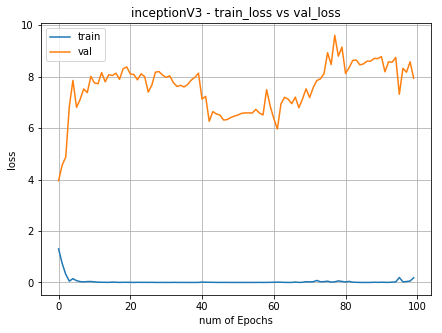

In [10]:
import matplotlib.pyplot as plt
# visualizing losses and accuracy
train_loss=hist.history['loss']
val_loss=hist.history['val_loss']
train_acc=hist.history['acc']
val_acc=hist.history['val_acc']
xc=range(100)

plt.figure(1,figsize=(7,5))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)
plt.xlabel('num of Epochs')
plt.ylabel('loss')
plt.title('inceptionV3 - train_loss vs val_loss')
plt.grid(True)
plt.legend(['train','val'])

#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])

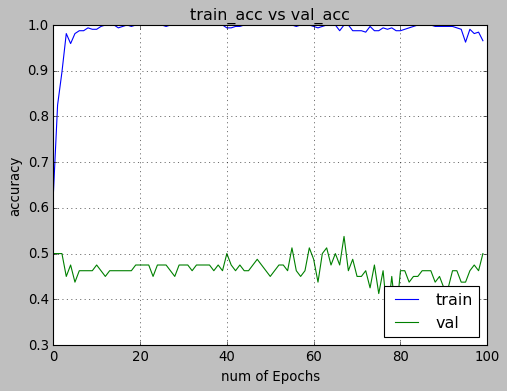

In [11]:
plt.figure(2,figsize=(7,5))
plt.plot(xc,train_acc)
plt.plot(xc,val_acc)
plt.xlabel('num of Epochs')
plt.ylabel('accuracy')
plt.title('train_acc vs val_acc')
plt.grid(True)
plt.legend(['train','val'],loc=4)
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])